### Description
This Notebook shows how to train and use the library for music genre classification.

### Download data
For this part you will need to have kaggle installed. `pip install kaggle`.
Alternativaly you could download the dataset from `https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification` and manually extract it into `../data/gtzan-dataset-music-genre-classification`

In [1]:
import os
import subprocess

dataset_path = "data/gtzan-dataset-music-genre-classification"

if not os.path.exists(dataset_path):
    print("Dataset not found. Downloading...")
    os.makedirs(dataset_path, exist_ok=True)
    subprocess.run(["kaggle", "datasets", "download", "-d", "andradaolteanu/gtzan-dataset-music-genre-classification", "-p", dataset_path, "--unzip"])
    print("Download complete.")
else:
    print("Dataset already exists.")

Dataset already exists.


### Data format
We first have to create a dataframe which stores all the data (file paths and labels)

In [2]:
import pandas as pd

In [3]:
genres_path = os.path.join(dataset_path, "Data/genres_original")
paths = []
labels = []
for genre in os.listdir(genres_path):
    folder_path = os.path.join(genres_path, genre)
    for filename in os.listdir(folder_path):
        paths.append(os.path.join(folder_path, filename))
        labels.append(genre)
df = pd.DataFrame({"file_path": paths, "label": labels})
df.sample(5)

,file_path,label
10,data/gtzan-dataset-music-genre-classification\...,blues
342,data/gtzan-dataset-music-genre-classification\...,disco
407,data/gtzan-dataset-music-genre-classification\...,hiphop
952,data/gtzan-dataset-music-genre-classification\...,rock
413,data/gtzan-dataset-music-genre-classification\...,hiphop


Import library

In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
sys.path.insert(0, os.path.abspath('../'))

### Model training

In [5]:
from auto_audio.auto_audio_model import AutoAudioModel
from auto_audio.hyperparameter_tuner import HyperparameterTuner


df_train = df.sample(200, random_state=42)
df_test = df.sample(100, random_state=42)
tuner = HyperparameterTuner(search_method="random", n_iter=10)
model = AutoAudioModel()
model.fit(df_train, 500, tuner)

c:\Users\borek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Preprocessing audio files.


c:\repos\AutoAudio\auto_audio\preprocessing.py:54: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr)
c:\Users\borek\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Corrupted audio file: data/gtzan-dataset-music-genre-classification\Data/genres_original\jazz\jazz.00054.wav
Skipping this file
Finished preprocessing files.
Cuda not available. Not training transformer model.
Training SVM
SVM achieved 20.0% accuracy.
Tuning model hyperparameters.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'C': 1}
Tuned SVM achieved 50.0% accuracy.
Training KNN
KNN achieved 32.5% accuracy.
Tuning model hyperparameters.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Tuned KNN achieved 27.5% accuracy.
Tuning did not improve KNN. Keeping original.
Training Gradient Boosting
Gradient Boosting achieved 42.5% accuracy.
Tuning model hyperparameters.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_

Model Accuracy: 0.87


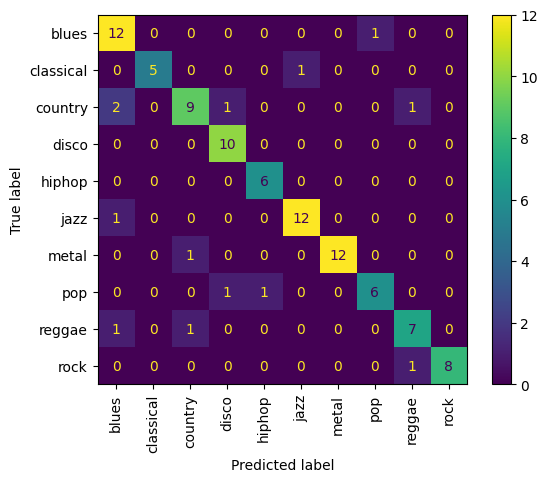

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y_test = df_test["label"]
y_pred = model.predict(df_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.xticks(rotation=90)
plt.show()